In [1]:
# Class of k-Nearest Neigbor Classifier


class kNN():
    def __init__(self, k = 3, exp = 2):
    # constructor for kNN classifier 
    # k is the number of neighbor for local class estimation
    # exp is the exponent for the Minkowski distance
        self.k = k
        self.exp = exp
      
    def fit(self, X_train, Y_train):
    # training k-NN method
    # X_train is the training data given with input attributes. n-th row correponds to n-th instance.
    # Y_train is the output data (output vector): n-th element of Y_train is the output value for n-th instance in X_train.
        self.X_train = X_train
        self.Y_train = Y_train  
        #Get the number of classes and their instance numbers in Y_train (pre-computing this will prevent us from having to compute it 
        #every time we want to predict something)
        self.classNames = {}
        for className in Y_train:
            if not className in self.classNames:
                self.classNames[className] = 1
            else:
                self.classNames[className] += 1
         
    def getDiscreteClassification(self, X_test):
    # predict-class k-NN method
    # X_test is the test data given with input attributes. Rows correpond to instances
    # Method outputs prediction vector Y_pred_test:  n-th element of Y_pred_test is the prediction for n-th instance in X_test
        
        Y_pred_test = [] #prediction vector Y_pred_test for all the test instances in X_test is initialized to empty list []

   
        for i in range(len(X_test)):   #iterate over all instances in X_test
            test_instance = X_test.iloc[i] #i-th test instance 
            
            distances = []  #list of distances of the i-th test_instance for all the train_instance s in X_train, initially empty.
          
            for j in range(len(self.X_train)):  #iterate over all instances in X_train
                train_instance = self.X_train.iloc[j] #j-th training instance 
                distance = self.Minkowski_distance(test_instance, train_instance) #distance between i-th test instance and j-th training instance  
                distances.append(distance) #add the distance to the list of distances of the i-th test_instance
        
            # Store distances in a dataframe. The dataframe has the index of Y_train in order to keep the correspondence with the classes of the training instances 
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
        
            # Sort distances, and only consider the k closest points in the new dataframe df_knn
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            
            # Note that the index df_knn.index of df_knn contains indices in Y_train of the k-closed training instances to 
            # the i-th test instance. Thus, the dataframe self.Y_train[df_knn.index] contains the classes of those k-closed 
            # training instances. Method value_counts() computes the counts (number of occurencies) for each class in 
            # self.Y_train[df_knn.index] in dataframe predictions. 
            predictions = self.Y_train[df_knn.index].value_counts()
            #print(self.Y_train[df_knn.index])     
            # the first element of the index predictions.index contains the class with the highest count; i.e. the prediction y_pred_test.
            y_pred_test = predictions.index[0]

            # add the prediction y_pred_test to the prediction vector Y_pred_test for all the test instances in X_test
            Y_pred_test.append(y_pred_test)
        
        return Y_pred_test

    
    def Minkowski_distance(self, x1, x2):
    # computes the Minkowski distance of x1 and x2 for two labeled instances (x1,y1) and (x2,y2)
    
        # Set initial distance to 0
        distance = 0
    
        # Calculate Minkowski distance using the exponent exp
        for i in range(len(x1)):
            distance = distance + abs(x1[i] - x2[i])**self.exp
        
        distance = distance**(1/self.exp)
    
        return distance
    
    
    #Task requires to have normalize as a function of kNN, so in order to prevent instantiating a new kNN object every time we need to normalize,
    # we can make it static
    @staticmethod
    def normalize(X):
        result = X.copy(deep=True)
        #For each columns...
        for col in X.columns:
            #...find the maximum value
            max_val = X[col].max()
            #...and divide the whole column by it to get a double value between 0 and 1
            result[col] /= max_val
        return result
    
    #getClassProbs method
    def getClassProbs(self, X_test):
        # X_test is the test data given with input attributes. Rows correpond to instances
        # Method outputs prediction dataframe Y_pred_test:  n-th element of Y_pred_test is the prediction vector with probabilities for n-th instance in X_test
        
        Y_pred_test = [] #prediction vector Y_pred_test for all the test instances in X_test is initialized to empty list []
        
        classNumber = len(self.classNames)
   
        for i in range(len(X_test)):   #iterate over all instances in X_test
            test_instance = X_test.iloc[i] #i-th test instance 
            
            distances = []  #list of distances of the i-th test_instance for all the train_instance s in X_train, initially empty.
          
            for j in range(len(self.X_train)):  #iterate over all instances in X_train
                train_instance = self.X_train.iloc[j] #j-th training instance 
                distance = self.Minkowski_distance(test_instance, train_instance) #distance between i-th test instance and j-th training instance  
                distances.append(distance) #add the distance to the list of distances of the i-th test_instance
        
            # Store distances in a dataframe. The dataframe has the index of Y_train in order to keep the correspondence with the classes of the training instances 
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
        
            # Sort distances, and only consider the k closest points in the new dataframe df_knn
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            
            # Note that the index df_knn.index of df_knn contains indices in Y_train of the k-closed training instances to 
            # the i-th test instance. Thus, the dataframe self.Y_train[df_knn.index] contains the classes of those k-closed 
            # training instances. Method value_counts() computes the counts (number of occurencies) for each class in 
            # self.Y_train[df_knn.index] in dataframe predictions. 
            predictions = self.Y_train[df_knn.index].value_counts()
            y_pred_test_dict = {}
            for className in self.classNames:
                y_pred_test_dict[className] = 0
            # COmpute the probabilities
            for i in range(0, len(predictions)):
                y_pred_test_dict[predictions.index[i]] = predictions.iloc[i] / self.k
            # add the prediction y_pred_test to the prediction vector Y_pred_test for all the test instances in X_test
            Y_pred_test.append(y_pred_test_dict)
        Y_pred_test = pd.DataFrame(data = Y_pred_test)
        return Y_pred_test
    
    #Regression prediction
    def getPrediction(self, X_test):
        # X_test is the test data given with input attributes. Rows correpond to instances
        # Method outputs prediction vector Y_pred_test:  n-th element of Y_pred_test is the prediction for n-th instance in X_test
        
        Y_pred_test = [] #prediction vector Y_pred_test for all the test instances in X_test is initialized to empty list []

   
        for i in range(len(X_test)):   #iterate over all instances in X_test
            test_instance = X_test.iloc[i] #i-th test instance 
            
            distances = []  #list of distances of the i-th test_instance for all the train_instance s in X_train, initially empty.
          
            for j in range(len(self.X_train)):  #iterate over all instances in X_train
                train_instance = self.X_train.iloc[j] #j-th training instance 
                distance = self.Minkowski_distance(test_instance, train_instance) #distance between i-th test instance and j-th training instance  
                distances.append(distance) #add the distance to the list of distances of the i-th test_instance
        
            # Store distances in a dataframe. The dataframe has the index of Y_train in order to keep the correspondence with the classes of the training instances 
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
        
            # Sort distances, and only consider the k closest points in the new dataframe df_knn
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            result = 0
            for i in range(0, self.k):
                result += Y_train[df_knn.index[i]]
            result /= self.k
            # add the prediction y_pred_test to the prediction vector Y_pred_test for all the test instances in X_test
            Y_pred_test.append(result)
        
        return Y_pred_test

[0.61643836 0.5890411  0.5890411  0.57534247 0.54794521 0.54794521
 0.61643836 0.5890411  0.57534247 0.57534247 0.56164384 0.5890411
 0.57534247 0.54794521 0.54794521 0.57534247]
[0.52054795 0.54794521 0.53424658 0.50684932 0.50684932 0.50684932
 0.53424658 0.52054795 0.53424658 0.49315068 0.49315068 0.47945205
 0.49315068 0.46575342 0.47945205 0.49315068]


Text(209.74318181818177, 0.5, 'Accuracy')

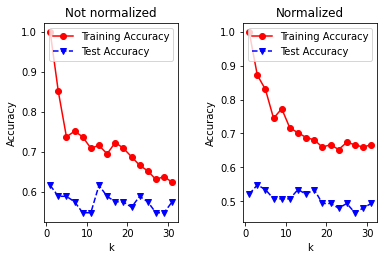

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy.random import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)

X_train_normalized = kNN.normalize(X_train)
X_test_normalized  = kNN.normalize(X_test)
# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))
norm_trainAcc = np.zeros(len(k_range))
norm_testAcc = np.zeros(len(k_range))

index = 0 
for k  in  k_range:
    #not normalized
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    #Normalized
    norm_clf = kNN(k)
    norm_clf.fit(X_train_normalized, Y_train)
    norm_Y_predTrain = norm_clf.getDiscreteClassification(X_train_normalized)
    norm_Y_predTest = norm_clf.getDiscreteClassification(X_test_normalized)
    norm_trainAcc[index] = accuracy_score(Y_train, norm_Y_predTrain)
    norm_testAcc[index] = accuracy_score(Y_test, norm_Y_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
print(testAcc)
print(norm_testAcc)

fig1, (ax1, ax2) = plt.subplots(1, 2)
fig1.tight_layout(pad=3.4)
ax1.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
ax1.set_title("Not normalized")
ax1.set_xlabel('k')
ax1.set_ylabel('Accuracy')
ax1.legend(['Training Accuracy','Test Accuracy'])

ax2.plot(k_range,norm_trainAcc,'ro-',k_range,norm_testAcc,'bv--')
ax2.set_title("Normalized")
ax2.legend(['Training Accuracy','Test Accuracy'])
ax2.set_xlabel('k')
ax2.set_ylabel('Accuracy')

# Task B (Comparing for normalized and un-normalized data)
## Glass data
When the data is normalized, you can see that the training accuracy is 1 for k = 1 (overfitting, very sharp and rough decision boundary), but quickly decreases, until it reaches its minimum at k = 23, with the training accuracy being 0.65248227 at that point. It remains about the same for the following values of k, staying between 0.65 and 0.675.
The test accuracy starts off at around 0.52 for k = 1, which can be explained by the small value of k, leading the kNN classifier to overfit the training data. It rises between k = 3 and k = 5, but then falls again to about 0.50 from k = 7 to k = 11. It's maximum is reached at k = 3, with the testing accuracy being 0.54794521 at that point. However, the training accuracy is still very high here at about 0.87234043. This could mean that there is still some overfitting, but it leads to the best result in testing accuracy. The second best testing accuracy is encountered at k = 5, 13 and 17, with a testing accuracy of 0.53424658 respectively.
When the data is not normalized, the training accuracy follows roughly the same plot (a little more stable than when using not normalized data). The testing accuracy however has a much higher variance, but starts off better, finding its maximum at k = 1 and k = 13, with a testing accuracy of 0.61643836 respectively.

So in conclusion, the normalization was able to somewhat stabilize the testing accuracies dependent on the k value, but it decreased the average accuracy.

[0.67175573 0.6870229  0.71755725 0.71374046 0.73664122 0.71374046
 0.72137405 0.73664122 0.71755725 0.70610687 0.70992366 0.69847328
 0.71755725 0.70229008 0.69083969 0.69083969]
[0.58396947 0.63358779 0.67938931 0.70229008 0.73282443 0.69847328
 0.70229008 0.69847328 0.70229008 0.6870229  0.68320611 0.70229008
 0.70610687 0.70610687 0.71374046 0.72137405]


Text(209.74318181818177, 0.5, 'Accuracy')

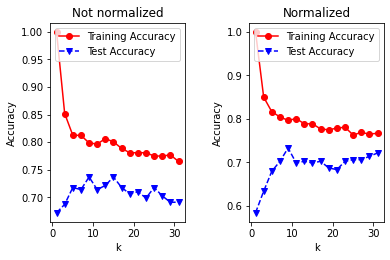

In [4]:
##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('diabetes.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)

X_train_normalized = kNN.normalize(X_train)
X_test_normalized  = kNN.normalize(X_test)
# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))
norm_trainAcc = np.zeros(len(k_range))
norm_testAcc = np.zeros(len(k_range))

index = 0 
for k  in  k_range:
    #not normalized
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    #Normalized
    norm_clf = kNN(k)
    norm_clf.fit(X_train_normalized, Y_train)
    norm_Y_predTrain = norm_clf.getDiscreteClassification(X_train_normalized)
    norm_Y_predTest = norm_clf.getDiscreteClassification(X_test_normalized)
    norm_trainAcc[index] = accuracy_score(Y_train, norm_Y_predTrain)
    norm_testAcc[index] = accuracy_score(Y_test, norm_Y_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
print(testAcc)
print(norm_testAcc)

fig1, (ax1, ax2) = plt.subplots(1, 2)
fig1.tight_layout(pad=3.4)
ax1.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
ax1.set_title("Not normalized")
ax1.set_xlabel('k')
ax1.set_ylabel('Accuracy')
ax1.legend(['Training Accuracy','Test Accuracy'])

ax2.plot(k_range,norm_trainAcc,'ro-',k_range,norm_testAcc,'bv--')
ax2.set_title("Normalized")
ax2.legend(['Training Accuracy','Test Accuracy'])
ax2.set_xlabel('k')
ax2.set_ylabel('Accuracy')

## Diabetes data
When the data is not normalized, the training accuracy starts off at 1 for k = 1 but then quickly drops to about 0.85 for k = 3 and then about 0.8 for k = 5, after that it decreases realtively smoothly, reaching its minimum at k = 31 with the training accuracy being approximately 0.76.
The testing accuracy starts at about 0.67 for k = 1 and increases rather steadily until k = 5, where it reaches about 0.74 = 74 % accuracy. It then falls and rises, with its maximum being at k = 9 (or k = 15) at about 0.73 = 73% testing accuracy. After that, it decreases on average, with its accuracy being at 0.72137405 for k = 31.

When the data is normalized, the training accuracy plot follows roughly the same shape, only a little smoother.
The testing accuracy however is much smoother and more stable compared to the testing accuracy when using data that is not normalized. It starts off worse with a value of 0.58396947 at k = 1, but then steadily increases until k = 9, where it has its maximum with a testing accuracy of 0.73282443. After that, it decreases again and stay at about 0.7 with some exceptions. It starts to rise again as k gets bigger than 21.

In conclusion, one can observe that normalizing the data helps in smoothing out the accuracy over k plots, while reducing the maximum accuracy. This leads to some sort of suspected tradeoff between maximum accuracy and "k-training/choosing-stability".

Text(0, 0.5, 'Accuracy')

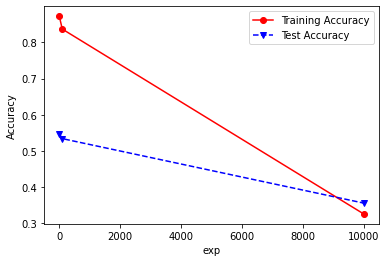

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from numpy.random import random

##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)
#Normalizing
X_train = kNN.normalize(X_train)
X_test = kNN.normalize(X_test)

# range for the values of parameter exp for kNN

exp_range = [2,  100, 10000]

trainAcc = np.zeros(len(exp_range))
testAcc = np.zeros(len(exp_range))


index = 0 
for exp  in  exp_range:
    clf = kNN(k = 3, exp = exp)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(exp_range,trainAcc,'ro-',exp_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('exp')
plt.ylabel('Accuracy')


## Task B 2
Apart from high exponents leading to overflow errors when the data is not normalized (because the computed distances get too large to be represented properly), the exponents in the Minkowski-distance formula negatively impact the training and test accuracies when they get too big. This is explained by, when the exponent gets bigger, the weight on the highest distance in attribute values increases, leading kNN to focus less and less on all of the attributes, until only the attribute of the instance to be classified with the maximum distance to the corresponding test instance's attribute is used as the overall distance between the two instances, leading kNN to only consider this attribute. This destroys accuracy, since the dimensionality upon which the classification is performed is greatly reduced, hindering kNN from classifying with respect to a combination of values.

In [7]:
#Task C
data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)
X_train_normalized = kNN.normalize(X_train)
X_test_normalized  = kNN.normalize(X_test)
clf = kNN(11)
clf.fit(X_train_normalized, Y_train)
clf.getClassProbs(X_test)

,'build wind float','build wind non-float',headlamps,'vehic wind float',containers,tableware
0,0.454545,0.181818,0.000000,0.181818,0.000000,0.181818
1,0.272727,0.363636,0.000000,0.000000,0.000000,0.363636
2,0.000000,0.000000,0.727273,0.000000,0.181818,0.090909
3,0.636364,0.181818,0.000000,0.000000,0.000000,0.181818
4,0.272727,0.272727,0.000000,0.181818,0.000000,0.272727
...,...,...,...,...,...,...
68,0.545455,0.090909,0.000000,0.181818,0.000000,0.181818
69,0.363636,0.363636,0.000000,0.000000,0.000000,0.272727
70,0.000000,0.090909,0.454545,0.000000,0.090909,0.363636
71,0.454545,0.363636,0.000000,0.000000,0.000000,0.181818


In [8]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

Text(0, 0.5, 'Error')

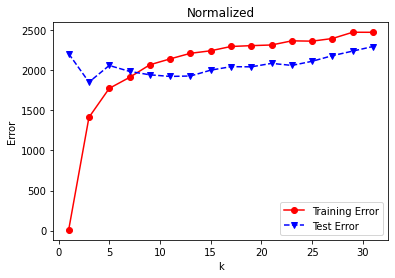

In [9]:
data = pd.read_csv('autoprice.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)
data.head()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)

X_train = kNN.normalize(X_train)
X_test = kNN.normalize(X_test)

clf = kNN(11)
clf.fit(X_train, Y_train)

# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))
norm_trainErr = np.zeros(len(k_range))
norm_testErr = np.zeros(len(k_range))

index = 0 
for k  in  k_range:
    #Normalized
    norm_clf = kNN(k)
    norm_clf.fit(X_train, Y_train)
    y_pred_train = norm_clf.getPrediction(X_train)
    y_pred_test = norm_clf.getPrediction(X_test)
    norm_trainErr[index] = mean_absolute_error(Y_train.values, y_pred_train)
    norm_testErr[index] = mean_absolute_error(Y_test.values, y_pred_test)
    index += 1

#########################################
# Plot of training and test errors
#########################################

plt.plot(k_range,norm_trainErr,'ro-',k_range,norm_testErr,'bv--')
plt.title("Normalized")
plt.legend(['Training Error','Test Error'])
plt.xlabel('k')
plt.ylabel('Error')

### Note: The normalized data will have a higher error, probably because the values are squashed between 0 and 1 (or -1 and 1), leading to a lower resolution than when using the full range of the data.

Text(209.74318181818177, 0.5, 'Mean absolute error')

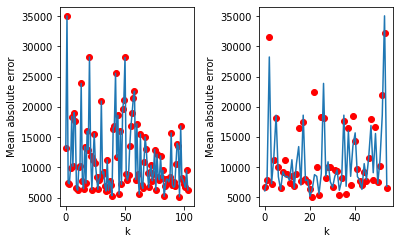

In [11]:
#Example of overfitting, just trying around
data = pd.read_csv('autoprice.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)
data.head()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)

norm_clf = kNN(1)

norm_clf.fit(X_train, Y_train)

fig2, (ax1, ax2) = plt.subplots(1, 2)
fig2.tight_layout(pad=3.4)
ax1.plot(range(0, len(Y_train)), Y_train.values, "ro", norm_clf.getPrediction(X_train), "-")
ax1.set_xlabel('k')
ax1.set_ylabel('Mean absolute error')

ax2.plot(range(0, len(Y_test)), Y_test.values, "ro", norm_clf.getPrediction(X_test), "-")
ax2.set_xlabel('k')
ax2.set_ylabel('Mean absolute error')